In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_val_files = os.listdir('train_val_images')

In [3]:
test_files = os.listdir('test_images')

In [4]:
test_image = test_files[0]

In [5]:
image = Image.open(os.path.join('test_images', test_image)).resize((512, 512))

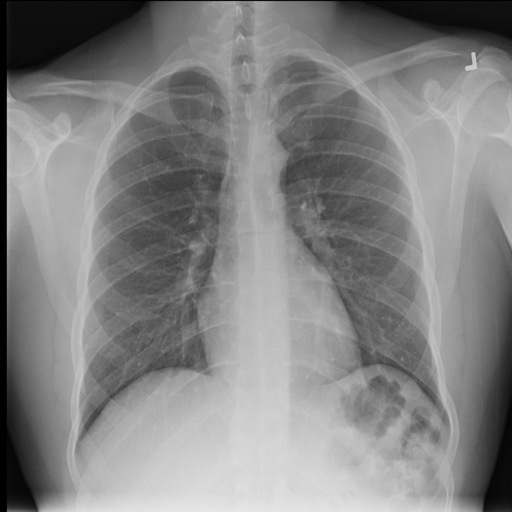

In [6]:
image

In [7]:
image_arr = np.array(image)

In [8]:
image_arr.shape

(512, 512)

In [9]:
label_df = pd.read_csv('Filtered_Data_Entry_DS541.csv')

In [10]:
label_df = label_df.rename(columns={'Unnamed: 0': 'full_index'})

In [11]:
label_df.head(10)

,full_index,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,46,00000013_046.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,107,00000032_060.png,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
2,108,00000072_000.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,72
3,112,00000092_003.png,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,92
4,153,00000116_040.png,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,116
5,163,00000149_009.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,149
6,169,00000150_005.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,150
7,235,00000181_065.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,181
8,255,00000193_019.png,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,193
9,299,00000211_043.png,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,211


In [12]:
train_val_df = label_df[label_df['id'].isin(train_val_files)][label_df.columns.drop(['full_index', 'subj_id'])]

In [13]:
train_val_df.head()

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Nodule,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding
2307,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2308,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2309,00000004_000.png,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2310,00000005_007.png,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2311,00000006_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
test_df = label_df[label_df['id'].isin(test_files)][label_df.columns.drop(['full_index', 'subj_id'])]

In [15]:
test_df.head()

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Nodule,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding
0,00000013_046.png,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,00000032_060.png,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00000072_000.png,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00000092_003.png,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00000116_040.png,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
def get_image_array(folder_path, file_path):
    image = Image.open(os.path.join(folder_path, file_path)).resize((512, 512)).convert('RGB')
    return np.array(image)

In [17]:
train_val_df['image_arr'] = train_val_df['id'].apply(lambda x: get_image_array('train_val_images', x))

In [18]:
test_df['image_arr'] = test_df['id'].apply(lambda x: get_image_array('test_images', x))

In [19]:
train_val_labels = train_val_df.iloc[:, 1:-1].values

In [20]:
train_val_labels[:5]

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [21]:
# Count the occurrences of each label
label_counts = np.sum(train_val_labels, axis=0)

# Print the counts for reference
for i, count in enumerate(label_counts):
    print(f"Label {i}: {count} samples")

Label 0: 1933 samples
Label 1: 635 samples
Label 2: 516 samples
Label 3: 155 samples
Label 4: 1769 samples
Label 5: 251 samples
Label 6: 475 samples
Label 7: 53 samples
Label 8: 3754 samples
Label 9: 1076 samples
Label 10: 1439 samples
Label 11: 680 samples
Label 12: 210 samples
Label 13: 335 samples
Label 14: 76 samples
Label 15: 10 samples
Label 16: 85 samples
Label 17: 237 samples
Label 18: 149 samples
Label 19: 18198 samples


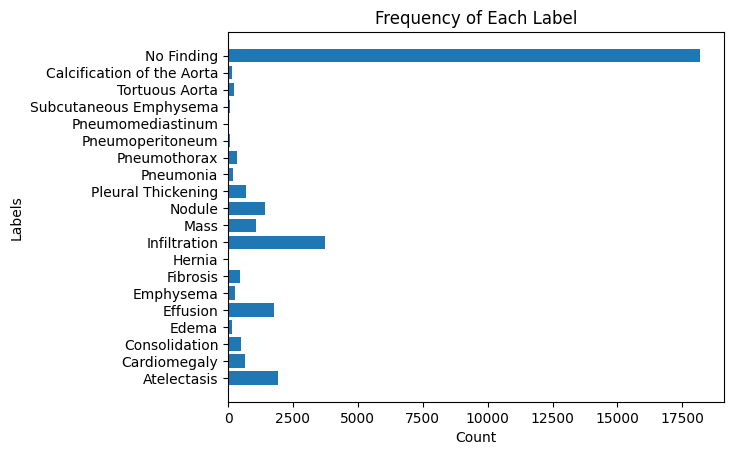

In [22]:
# Visualize the distribution of individual labels
plt.barh(range(len(label_counts)), label_counts)
plt.yticks(range(len(label_counts)), list(train_val_df.columns)[1:-1])
plt.xlabel("Count")
plt.ylabel("Labels")
plt.title("Frequency of Each Label")
plt.show()

In [23]:
# Convert label rows to tuples to represent combinations
label_combinations = [tuple(row) for row in train_val_labels]

In [24]:
# Count the occurrences of each unique combination
combination_counts = Counter(label_combinations)

In [25]:
# Visualize the top 10 most common combinations
top_combinations = combination_counts.most_common(10)

In [26]:
print("Top 10 Most Common Label Combinations:")
for combo, count in top_combinations:
    print(f"{combo}: {count} samples")

Top 10 Most Common Label Combinations:
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 18198 samples
(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 2466 samples
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 880 samples
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 743 samples
(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 573 samples
(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 471 samples
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 334 samples
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 299 samples
(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 221 samples
(1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 208 samples


In [27]:
# Convert combinations back to a format for visualization
combos = [' + '.join([list(train_val_df.columns)[1:-1][i] for i, v in enumerate(combo) if v]) for combo, _ in top_combinations]
counts = [count for _, count in top_combinations]

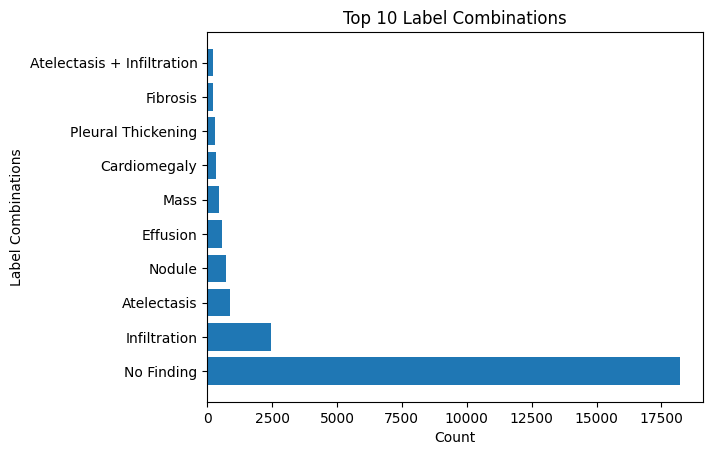

In [28]:
plt.barh(combos, counts)
plt.xlabel("Count")
plt.ylabel("Label Combinations")
plt.title("Top 10 Label Combinations")
plt.show()

In [29]:
# Compute co-occurrence matrix
co_occurrence_matrix = np.dot(train_val_labels.T, train_val_labels)

In [30]:
# Normalize (optional, to get probabilities)
co_occurrence_matrix = co_occurrence_matrix / train_val_labels.shape[0]

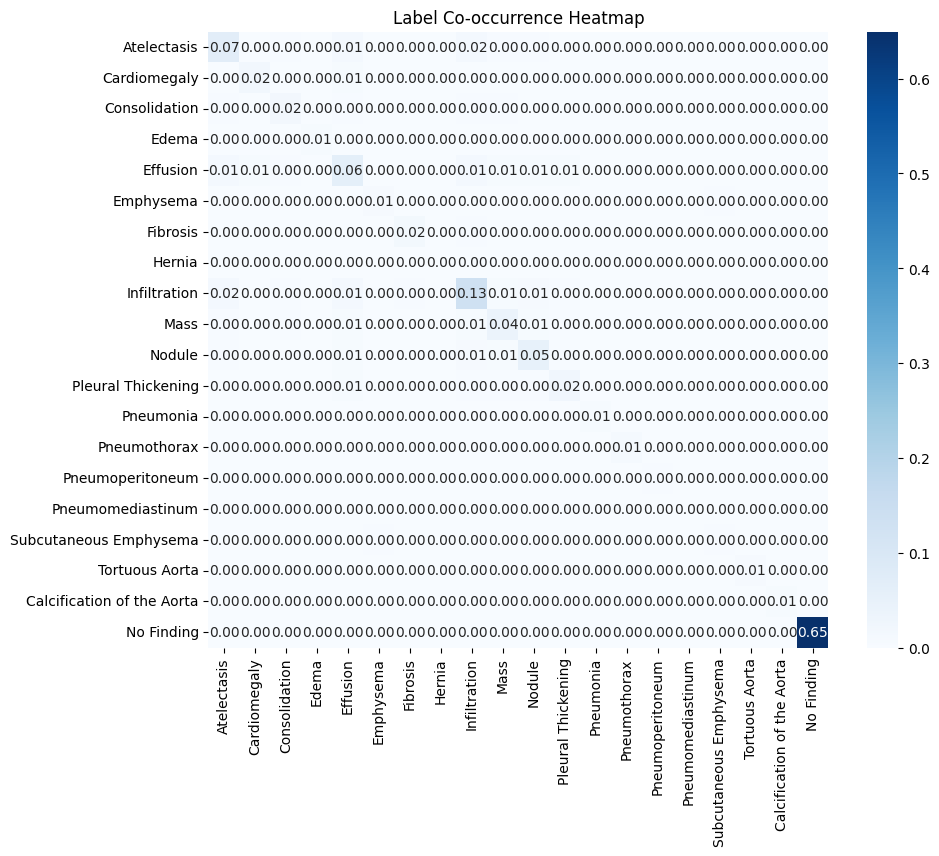

In [31]:
# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=[list(train_val_df.columns)[1:-1][i] for i in range(label_counts.shape[0])],
            yticklabels=[list(train_val_df.columns)[1:-1][i] for i in range(label_counts.shape[0])])
plt.title("Label Co-occurrence Heatmap")
plt.show()

In [32]:
test_df.head()

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,image_arr
0,00000013_046.png,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[[[223, 223, 223], [222, 222, 222], [220, 220,..."
1,00000032_060.png,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
2,00000072_000.png,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[[[220, 220, 220], [217, 217, 217], [216, 216,..."
3,00000092_003.png,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[[[45, 45, 45], [30, 30, 30], [20, 20, 20], [1..."
4,00000116_040.png,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[[[18, 18, 18], [22, 22, 22], [20, 20, 20], [2..."


In [33]:
list(label_df.columns)[1:-1]

['id',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural Thickening',
 'Pneumonia',
 'Pneumothorax',
 'Pneumoperitoneum',
 'Pneumomediastinum',
 'Subcutaneous Emphysema',
 'Tortuous Aorta',
 'Calcification of the Aorta',
 'No Finding']

In [34]:
predicted_labels = [list(label_df.columns)[2:-1][i] for i in [0, 1, 4, 8, 9, 10, 19]]

In [35]:
predicted_labels

['Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltration',
 'Mass',
 'Nodule',
 'No Finding']

In [36]:
for label in predicted_labels:
    print(label)

Atelectasis
Cardiomegaly
Effusion
Infiltration
Mass
Nodule
No Finding


In [37]:
for combo in combos:
    print(combo)

No Finding
Infiltration
Atelectasis
Nodule
Effusion
Mass
Cardiomegaly
Pleural Thickening
Fibrosis
Atelectasis + Infiltration


One possible idea: try to selectively improve the labels that are being predicted.

In [38]:
train_val_df.iloc[0, -1].shape

(512, 512, 3)